# Prediction using Decision Tree Algorithm

# 

# 

# 

## 

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree

## Importing the 'Iris' dataset

In [2]:
data = pd.read_csv('Iris.csv')
iris_data = data.copy()
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Checking for null values if any

In [3]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Understanding the dataset

In [4]:
iris_data.shape

(150, 6)

In [5]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Renaming some of the columns

In [7]:
iris_data.rename(columns={'SepalLengthCm': 'Sepal Length','SepalWidthCm': 'Sepal Width','PetalLengthCm': 'Petal Length','PetalWidthCm': 'Petal Width'},inplace=True)

## Description of Iris dataset

In [8]:
iris_data.describe()

,Id,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [58]:
iris_data.corr()

,Id,Sepal Length,Sepal Width,Petal Length,Petal Width
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
Sepal Length,0.716676,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.882747,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

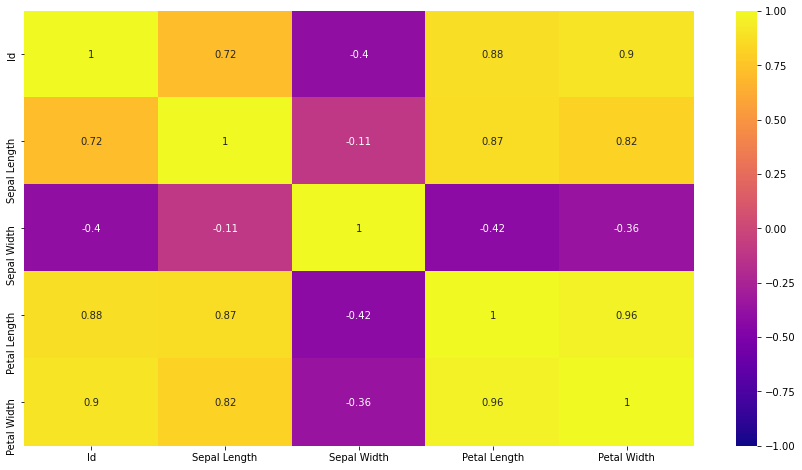

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(iris_data.corr(),annot=True,vmin=-1,vmax=1,cmap='plasma')

## Data Visualization

<Figure size 1440x720 with 0 Axes>

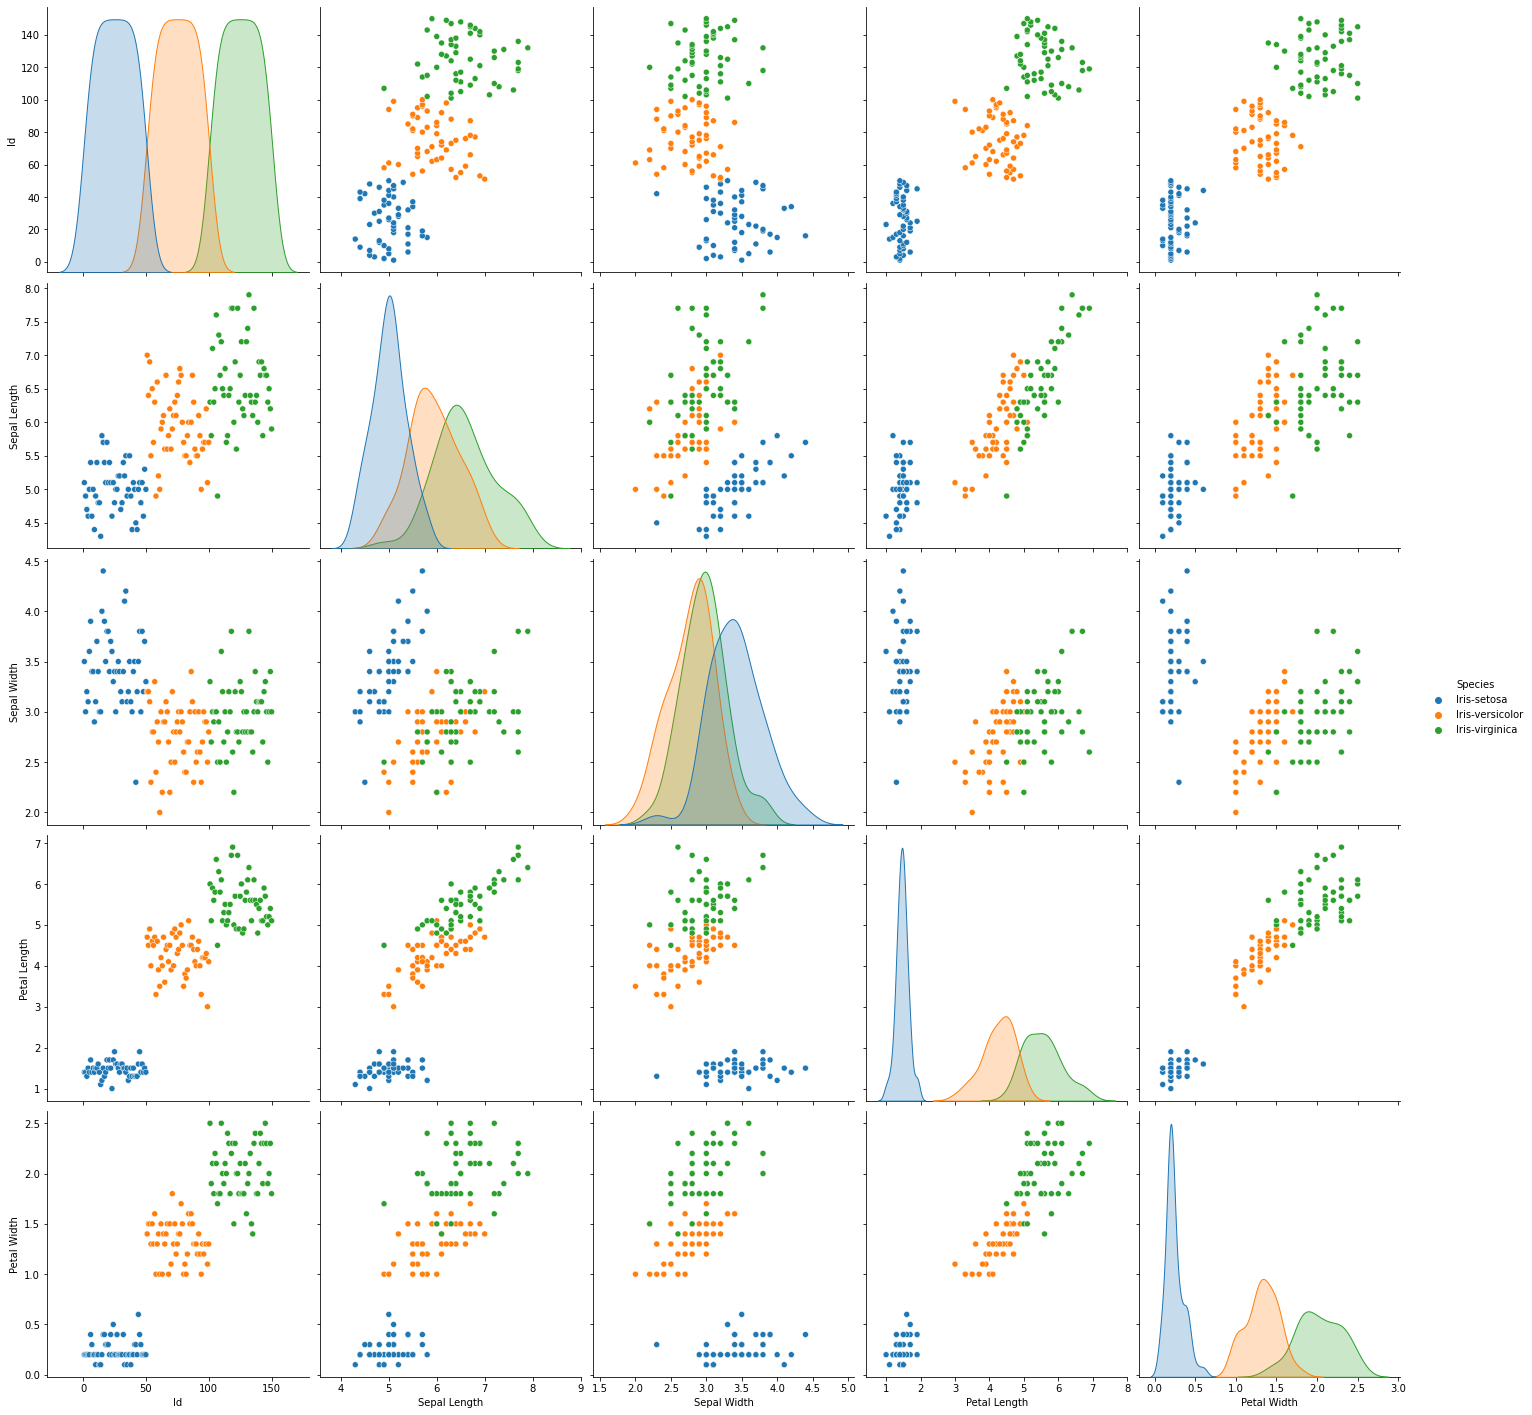

In [62]:
plt.figure(figsize=(20,10))
sns.pairplot(iris_data,hue='Species',height=4)
plt.show()

## Histograms for All Numerical Variables

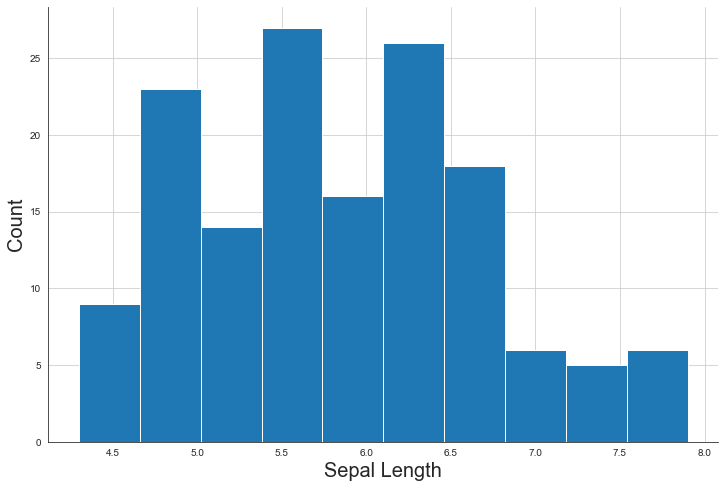

In [77]:
plt.figure(figsize=(12,8))
sns.set_style('white')
iris_data['Sepal Length'].hist()
sns.despine()
plt.xlabel('Sepal Length',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

## Sepal length between 5.4 and 5.7 has maximum count.

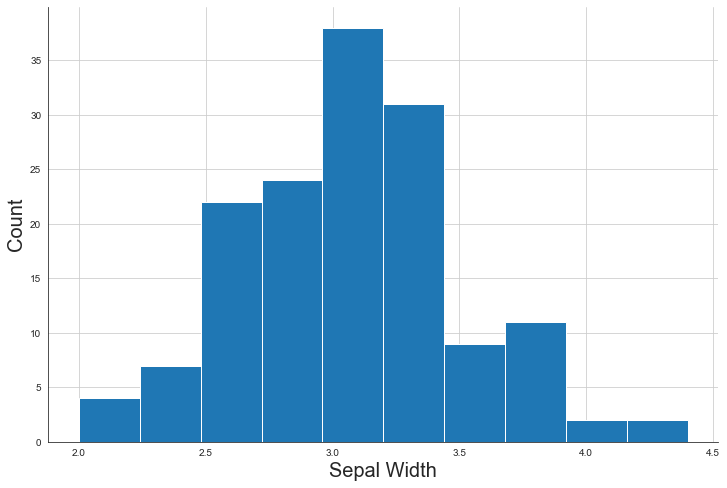

In [76]:
plt.figure(figsize=(12,8))
sns.set_style('white')
iris_data['Sepal Width'].hist()
sns.despine()
plt.xlabel('Sepal Width',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

## Sepal Width between 3.0 and 3.3 has maximum count.

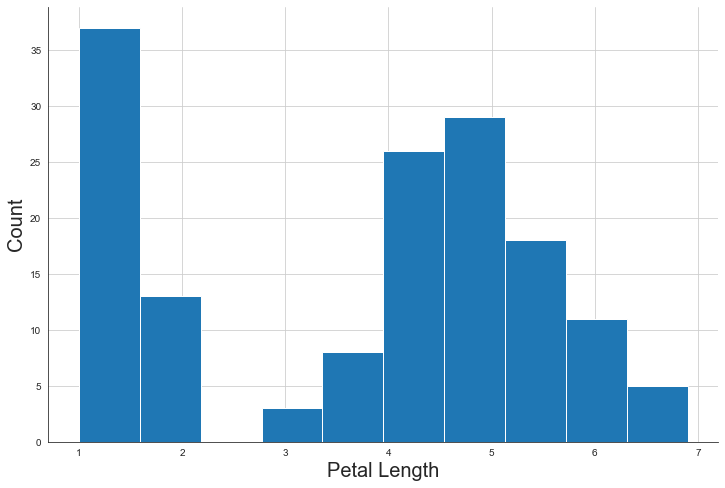

In [78]:
plt.figure(figsize=(12,8))
sns.set_style('white')
iris_data['Petal Length'].hist()
sns.despine()
plt.xlabel('Petal Length',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

## Petals having length between 1 and 1.5 have maximum count.

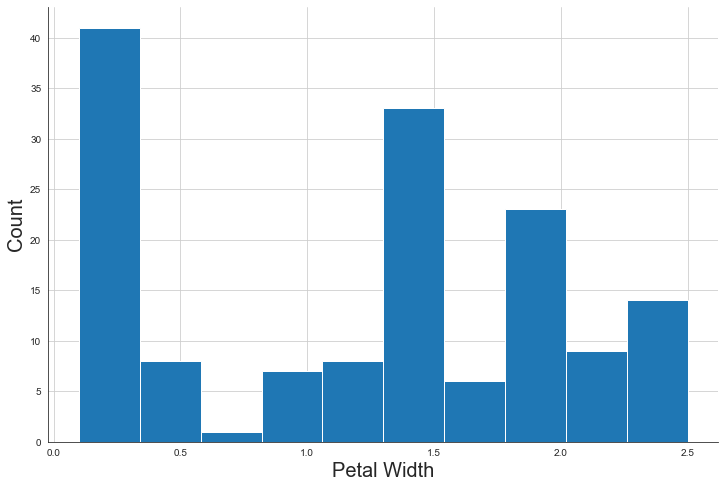

In [79]:
plt.figure(figsize=(12,8))
sns.set_style('white')
iris_data['Petal Width'].hist()
sns.despine()
plt.xlabel('Petal Width',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

## Petals having width between 0.1 and 0.4 have maximum count.

# Displaying number of samples of each species

In [9]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [32]:
x = iris_data.drop(['Id','Species'],axis=1)
y = iris_data['Species']

In [33]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Using train_test_split function to train model

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

## Using Decision Tree Classifier

In [36]:
dec_tree = DecisionTreeClassifier(criterion='gini',random_state=20)
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=20)

## Calculating Model Score

In [37]:
model_score = dec_tree.score(x_test,y_test)*100
print('The model score is {}.'.format(np.round(model_score,2)))

The model score is 97.78.


In [38]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [40]:
temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
temp

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
100,Iris-virginica,Iris-virginica
40,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor


## Calculating accuracy of prediction

In [41]:
accuracy_score(y_test,y_pred)

0.9777777777777777

## Predicting Species for new data

In [42]:
new_data = [[4.6, 2.0, 4.2, 1.1]]
y_pred = model.predict(new_data)
print(y_pred)

['Iris-versicolor']


## Plotting and Visualizing Decision Tree

In [56]:
features = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
species = iris_data['Species'].unique().tolist()

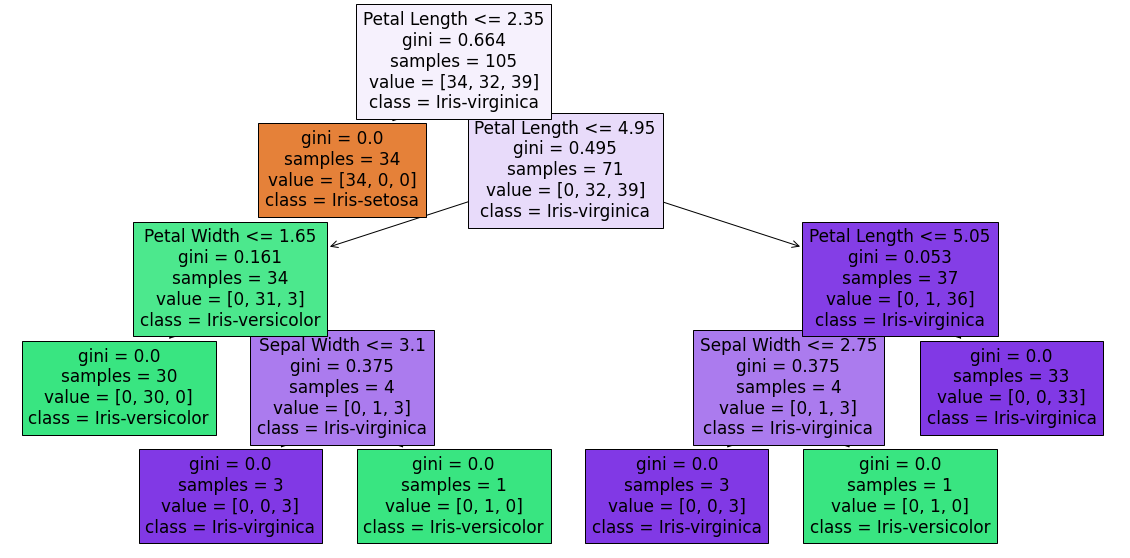

In [57]:
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=features,class_names=species,filled=True)
plt.show()

# THANK YOU